In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Dataframeda quyidagi ustunlardan iborat:
##### "INSTNM" - Institutning nomi
##### "OPEID" - Oliy ta'lim muassasalarini aniqlash raqami
##### "REGION" - mintaqasi
##### "SAT_AVG_BALL" - SATdan olgan bali
##### "PCTPELL" - (Pell granti foizi) oliy ta'lim muassasalarida o'qiyotgan bakalavr talabalarining necha foizi Pell grantlarini olishini ko'rsatadi. 
##### "PCTFLOAN" - (Federal kredit foizi) oliy ta'lim muassasalarida o'qiyotgan bakalavr talabalarining necha foizi federal talabalar kreditlarini olishi
##### "ADM_RATE_ALL" - (Umumiy qabul ko'rsatkichi)
##### "UG"  - (Bakalavriat) oliy ta'lim muassasalarida o'qiyotgan va odatda bakalavr darajasini olishni maqsad qilgan talabalarni anglatadi
##### "AVGFACSAL" - (O'rtacha o'qituvchilar maoshi) oliy ta'lim muassasasidagi o'qituvchilarning o'rtacha maoshini bildiradi.
##### "COMPL_RPY_5YR_RT" - (5 yillik to'lov darajasi) o'qishni tugatgan va federal talabalar kreditlarining bir qismini qaytarishni boshlaganidan keyin besh yil ichida muvaffaqiyatli to'lagan talabalarning foizini bildiradi.
##### "DEBT_MDN" - (O'rtacha qarz miqdori) oliy ta'lim muassasasini tamomlagan talabalarning bitiruv paytidagi o'rtacha qarz miqdorini bildiradi.
##### "MEDIAN_HH_INC" - (O'rtacha oila daromadi) berilgan hudud yoki ma'lumotlar to'plamida oilalar o'rtacha daromadining o'rta qiymatini bildiradi.
##### "ICLEVEL" - (Muassasa darajasi) oliy ta'lim muassasalarini ta'lim darajasi bo'yicha tartiblash uchun ishlatiladi. Muassasalar o'zlarining taqdim etayotgan daraja ko'rsatkichiga qarab tartiblanadi.
##### "HIGHDEG" - (Eng yuqori daraja) oliy ta'lim muassasalarida taqdim etilayotgan eng yuqori ta'lim darajasini ko'rsatkichdir. Bu ko'rsatkich muassasalarning taqdim etish mumkin bo'lgan eng yuqori akademik daraja asosida o'rganiladi.
##### "CONTROL" - (Boshqaruv) oliy ta'lim muassasalarining boshqarish turi bo'yicha ko'rsatkichdir, ya'ni ular davlat tomonidan, jamoat jamoatchilik tashkilotlari tomonidan yoki tijorat uchun faoliyat ko'rsatayotgan jismoniy tashkilotlar tomonidan boshqarilishi bo'lsa,ular yordam beradi.
##### "WOMENONLY" - (Faqat ayollar uchun) oliy ta'lim muassasasi faqatgina ayollar uchun ekanligini anglatadi.
##### "MENONLY" - (Faqat erkaklar uchun) oliy ta'lim muassasasi faqatgina erkaklar uchun ekanligini anglatadi.
##### "LOCALE" - (Mahalla) oliy ta'lim muassasasining joylashgan geografik hudud va shaharni ifodalaydigan hudud kodi.
##### 'Tuition' - kontrakt
##### 'Degree_Type' - "Daraja turi"
##### "Ownership" - (Egalik) mulk, hissa, intellektual mulk yoki boshqa aktivlarning egalik huquqi va nazoratini anglatadi.
##### "Regions" - (Hududlar) ma'lum bir geografik hududlar yoki ma'muriy bo'linmalar, ko'pincha davlat yoki mamlakat ichidagi tuman yoki viloyatlar.
##### "Locales" - (Mahallalar) ma'lum bir joylashuv yoki hududni ifodalaydigan geografik joylashuv kodi, ko'pincha biror joyning ijtimoiy va madaniy xususiyatlarini ifodalaydi.
##### "Locale_Short" - (Qisqa Mahalla) qisqa shaklda ko'rsatilgan geografik joylashuv yoki hudud kodi, ko'pincha ijtimoiy va madaniy xususiyatlarni o'z ichiga oladi.



In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/2210/datasets/794e0759b73a2d80baa5d8fb88636a47965139d3/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


### Datasetimizda ustunlarni ko'rib olamiz

In [3]:
df.columns

Index(['INSTNM', 'OPEID', 'REGION', 'SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN',
       'ADM_RATE_ALL', 'UG', 'AVGFACSAL', 'COMPL_RPY_5YR_RT', 'DEBT_MDN',
       'MEDIAN_HH_INC', 'ICLEVEL', 'HIGHDEG', 'CONTROL', 'WOMENONLY',
       'MENONLY', 'LOCALE', 'Tuition', 'Degree_Type', 'Ownership', 'Regions',
       'Locales', 'Locale_Short'],
      dtype='object')

### Datasetning o'lchamini shape methodi orqali ko'rib olamiz

In [4]:
df.shape

(6702, 24)

### Datasetimizni info methodi orqali tekshirib nullar, ustunlar tipi, datasetimizning umumiy hajmi (memory_usage = 'deep') haqida ma'lumotlarni ko'rib olamiz

In [5]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6702 non-null   object 
 1   OPEID             6702 non-null   int64  
 2   REGION            6702 non-null   int64  
 3   SAT_AVG_ALL       1387 non-null   float64
 4   PCTPELL           6066 non-null   float64
 5   PCTFLOAN          6066 non-null   float64
 6   ADM_RATE_ALL      2180 non-null   float64
 7   UG                4367 non-null   float64
 8   AVGFACSAL         4104 non-null   float64
 9   COMPL_RPY_5YR_RT  5708 non-null   object 
 10  DEBT_MDN          6681 non-null   object 
 11  MEDIAN_HH_INC     4993 non-null   object 
 12  ICLEVEL           6702 non-null   int64  
 13  HIGHDEG           6702 non-null   int64  
 14  CONTROL           6702 non-null   int64  
 15  WOMENONLY         6368 non-null   float64
 16  MENONLY           6368 non-null   float64


In [6]:
very_old_describe = df.describe() # - keyinchalik tozalangan dataset statistikasi bilan solishtirish uchun buni tenglab olib qoyamiz
very_old_df = df # - keyinchalik tozalangan dataset bilan solishtirish uchun buni tenglab olib qoyamiz

### Datasetimizning numeric ustunlari uchun statistik ma'lumotlarni describe() methodi yordamida chiqarib olamiz

In [7]:
df.describe()

,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition
count,6.702000e+03,6702.000000,1387.000000,6066.000000,6066.000000,2180.000000,4367.000000,4104.000000,6702.000000,6702.000000,6702.000000,6368.000000,6368.000000,6368.000000,5735.00000
mean,1.788528e+06,4.602954,1065.332372,0.502318,0.490676,0.681821,2945.242501,6451.342105,1.811698,2.276783,2.106535,0.006124,0.009893,19.928235,15652.00279
std,3.304120e+06,2.177145,134.879236,0.220404,0.279644,0.204033,4974.178446,2376.043146,0.817686,1.324162,0.839619,0.078024,0.098979,9.618824,8026.04205
min,1.002000e+05,0.000000,708.000000,0.000000,0.000000,0.000000,0.000000,361.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.000000,-2138.00000
25%,3.188250e+05,3.000000,981.500000,0.338525,0.285725,0.556846,160.000000,4893.750000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,9292.50000
50%,1.005302e+06,5.000000,1048.000000,0.483850,0.548200,0.699771,1013.000000,6222.500000,2.000000,2.000000,2.000000,0.000000,0.000000,21.000000,14952.00000
75%,2.598900e+06,6.000000,1127.000000,0.666700,0.704500,0.823808,3259.500000,7742.000000,3.000000,4.000000,3.000000,0.000000,0.000000,22.000000,20681.50000
max,8.209884e+07,9.000000,1544.000000,1.000000,1.000000,1.000000,46834.000000,26084.000000,3.000000,4.000000,3.000000,1.000000,1.000000,43.000000,93368.00000


### Dataframeda ustunlardagi null qiymatlarning ulushini chiqarib olamiz 

In [8]:
df.isnull().mean() * 100

INSTNM               0.000000
OPEID                0.000000
REGION               0.000000
SAT_AVG_ALL         79.304685
PCTPELL              9.489705
PCTFLOAN             9.489705
ADM_RATE_ALL        67.472396
UG                  34.840346
AVGFACSAL           38.764548
COMPL_RPY_5YR_RT    14.831394
DEBT_MDN             0.313339
MEDIAN_HH_INC       25.499851
ICLEVEL              0.000000
HIGHDEG              0.000000
CONTROL              0.000000
WOMENONLY            4.983587
MENONLY              4.983587
LOCALE               4.983587
Tuition             14.428529
Degree_Type          0.000000
Ownership            0.000000
Regions              0.000000
Locales              4.983587
Locale_Short         5.028350
dtype: float64

#### Datasetimizda null qiymatlar deyarli 80%i ni tashkil qiluvchi ustunlar ham bor ekan. Biz endi funksiya yozamiz berilgan foizdan ko'p null ulushga ega ustunlarni tushirib yuboradigan

In [9]:
# for i in df.columns:
#     if df[i].isnull().mean() * 100 >= 10:
#         del df[i]
ls = []
for column in df.columns:
    if df[column].isnull().mean() * 100 >= 20:
        df = df.drop(column, axis = 1)
        ls.append(column)


In [10]:
display(df.shape)

(6702, 19)

### Datasetimizdan missing valueslar ulushi 20% ga tengda va undan yudori miqdorga ega bo'lgan ustunlarni tashlab yubordim va shundan so'ng 4ta ustun tushirib yuborildi

In [11]:
ls

['SAT_AVG_ALL', 'ADM_RATE_ALL', 'UG', 'AVGFACSAL', 'MEDIAN_HH_INC']

### Dataframeda quyidagi ustunlardan iborat:
##### "INSTNM" - Institutning nomi
##### "OPEID" - Oliy ta'lim muassasalarini aniqlash raqami
##### "REGION" - mintaqasi
##### "PCTPELL" - (Pell granti foizi) oliy ta'lim muassasalarida o'qiyotgan bakalavr talabalarining necha foizi Pell grantlarini olishini ko'rsatadi. 
##### "PCTFLOAN" - (Federal kredit foizi) oliy ta'lim muassasalarida o'qiyotgan bakalavr talabalarining necha foizi federal talabalar kreditlarini olishi
##### "UG"  - (Bakalavriat) oliy ta'lim muassasalarida o'qiyotgan va odatda bakalavr darajasini olishni maqsad qilgan talabalarni anglatadi
##### "COMPL_RPY_5YR_RT" - (5 yillik to'lov darajasi) o'qishni tugatgan va federal talabalar kreditlarining bir qismini qaytarishni boshlaganidan keyin besh yil ichida muvaffaqiyatli to'lagan talabalarning foizini bildiradi.
##### "DEBT_MDN" - (O'rtacha qarz miqdori) oliy ta'lim muassasasini tamomlagan talabalarning bitiruv paytidagi o'rtacha qarz miqdorini bildiradi.
##### "ICLEVEL" - (Muassasa darajasi) oliy ta'lim muassasalarini ta'lim darajasi bo'yicha tartiblash uchun ishlatiladi. Muassasalar o'zlarining taqdim etayotgan daraja ko'rsatkichiga qarab tartiblanadi.
##### "HIGHDEG" - (Eng yuqori daraja) oliy ta'lim muassasalarida taqdim etilayotgan eng yuqori ta'lim darajasini ko'rsatkichdir. Bu ko'rsatkich muassasalarning taqdim etish mumkin bo'lgan eng yuqori akademik daraja asosida o'rganiladi.
##### "CONTROL" - (Boshqaruv) oliy ta'lim muassasalarining boshqarish turi bo'yicha ko'rsatkichdir, ya'ni ular davlat tomonidan, jamoat jamoatchilik tashkilotlari tomonidan yoki tijorat uchun faoliyat ko'rsatayotgan jismoniy tashkilotlar tomonidan boshqarilishi bo'lsa,ular yordam beradi.
##### "WOMENONLY" - (Faqat ayollar uchun) oliy ta'lim muassasasi faqatgina ayollar uchun ekanligini anglatadi.
##### "MENONLY" - (Faqat erkaklar uchun) oliy ta'lim muassasasi faqatgina erkaklar uchun ekanligini anglatadi.
##### "LOCALE" - (Mahalla) oliy ta'lim muassasasining joylashgan geografik hudud va shaharni ifodalaydigan hudud kodi.
##### 'Tuition' - kontrakt
##### 'Degree_Type' - "Daraja turi"
##### "Ownership" - (Egalik) mulk, hissa, intellektual mulk yoki boshqa aktivlarning egalik huquqi va nazoratini anglatadi.
##### "Regions" - (Hududlar) ma'lum bir geografik hududlar yoki ma'muriy bo'linmalar, ko'pincha davlat yoki mamlakat ichidagi tuman yoki viloyatlar.
##### "Locales" - (Mahallalar) ma'lum bir joylashuv yoki hududni ifodalaydigan geografik joylashuv kodi, ko'pincha biror joyning ijtimoiy va madaniy xususiyatlarini ifodalaydi.
##### "Locale_Short" - (Qisqa Mahalla) qisqa shaklda ko'rsatilgan geografik joylashuv yoki hudud kodi, ko'pincha ijtimoiy va madaniy xususiyatlarni o'z ichiga oladi.



### Tozalashdan so'ng bizda tepadagi ustunlar qoldi va biz bu ustunlar bilan ishlashda davom etamiz

In [12]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6702 non-null   object 
 1   OPEID             6702 non-null   int64  
 2   REGION            6702 non-null   int64  
 3   PCTPELL           6066 non-null   float64
 4   PCTFLOAN          6066 non-null   float64
 5   COMPL_RPY_5YR_RT  5708 non-null   object 
 6   DEBT_MDN          6681 non-null   object 
 7   ICLEVEL           6702 non-null   int64  
 8   HIGHDEG           6702 non-null   int64  
 9   CONTROL           6702 non-null   int64  
 10  WOMENONLY         6368 non-null   float64
 11  MENONLY           6368 non-null   float64
 12  LOCALE            6368 non-null   float64
 13  Tuition           5735 non-null   float64
 14  Degree_Type       6702 non-null   object 
 15  Ownership         6702 non-null   object 
 16  Regions           6702 non-null   object 


#### info methodidan yana qayta foydalanib ma'lumotlarni ko'rib oldim va natija anchayin null qiymatlardan holi bo'lgan ma'lumotlarni berdi va datasetning xotirasi ham kamaydi 
###   <------ eski datasetning xotiradan olgan joyi
###   <------ yangi datasetning xotiradan olgan joyi

In [13]:
df.select_dtypes('number')

,OPEID,REGION,PCTPELL,PCTFLOAN,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition
0,100200,5,0.7249,0.8159,1,4,1,0.0,0.0,12.0,13435.0
1,105200,5,0.3505,0.5218,1,4,1,0.0,0.0,12.0,16023.0
2,2503400,5,0.7455,0.8781,1,4,2,0.0,0.0,12.0,8862.0
3,105500,5,0.3179,0.4589,1,4,1,0.0,0.0,12.0,18661.0
4,100500,5,0.7567,0.7692,1,4,1,0.0,0.0,12.0,7400.0
...,...,...,...,...,...,...,...,...,...,...,...
6697,4205801,8,NaN,NaN,3,0,3,NaN,NaN,NaN,NaN
6698,869423,4,NaN,NaN,1,0,3,NaN,NaN,NaN,NaN
6699,4220901,3,NaN,NaN,3,0,3,NaN,NaN,NaN,NaN
6700,4223701,8,NaN,NaN,3,0,3,NaN,NaN,NaN,NaN


In [14]:
df.select_dtypes('object')

,INSTNM,COMPL_RPY_5YR_RT,DEBT_MDN,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,0.477631579,14600,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,0.673230442,14250,Graduate,Public,South East,City: Midsize,City
2,Amridge University,0.636363636,11082,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,0.762222222,15000,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,0.43006993,15274,Graduate,Public,South East,City: Midsize,City
...,...,...,...,...,...,...,...,...
6697,SAE Institute of Technology San Francisco,NaN,5500,Non-degree,Private for-profit,Far West,NaN,NaN
6698,Rasmussen College - Overland Park,0.598980065,10851.5,Non-degree,Private for-profit,Plains,NaN,NaN
6699,National Personal Training Institute of Cleveland,NaN,6333,Non-degree,Private for-profit,Great Lakes,NaN,NaN
6700,Bay Area Medical Academy - San Jose Satellite ...,NaN,5500,Non-degree,Private for-profit,Far West,NaN,NaN


### Datasetimizning object qismida 2ta numeric(object tipida) ma'lumot bor ekan bular 'DEBT_MDN' va COMPL_RPY_5YR_RT ustunlari va biz bu ustunlarni numeric formatga o'tkazib olamiz

In [15]:
df['DEBT_MDN'] = pd.to_numeric(df['DEBT_MDN'], errors = 'coerce')
df['COMPL_RPY_5YR_RT'] = pd.to_numeric(df['COMPL_RPY_5YR_RT'], errors = 'coerce')
old_describe = df.describe() # - keyinchalik tozalangan dataset statistikasi bilan solishtirish uchun buni tenglab olib qoyamiz
old_df = df # - keyinchalik tozalangan dataset bilan solishtirish uchun buni tenglab olib qoyamiz

#### 'DEBT_MDN' va 'COMPL_RPY_5YR_RT' ustunlarini numerikka o'tkazib oldim

In [16]:
df.select_dtypes('number')

,OPEID,REGION,PCTPELL,PCTFLOAN,COMPL_RPY_5YR_RT,DEBT_MDN,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition
0,100200,5,0.7249,0.8159,0.477632,14600.0,1,4,1,0.0,0.0,12.0,13435.0
1,105200,5,0.3505,0.5218,0.673230,14250.0,1,4,1,0.0,0.0,12.0,16023.0
2,2503400,5,0.7455,0.8781,0.636364,11082.0,1,4,2,0.0,0.0,12.0,8862.0
3,105500,5,0.3179,0.4589,0.762222,15000.0,1,4,1,0.0,0.0,12.0,18661.0
4,100500,5,0.7567,0.7692,0.430070,15274.0,1,4,1,0.0,0.0,12.0,7400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,4205801,8,NaN,NaN,NaN,5500.0,3,0,3,NaN,NaN,NaN,NaN
6698,869423,4,NaN,NaN,0.598980,10851.5,1,0,3,NaN,NaN,NaN,NaN
6699,4220901,3,NaN,NaN,NaN,6333.0,3,0,3,NaN,NaN,NaN,NaN
6700,4223701,8,NaN,NaN,NaN,5500.0,3,0,3,NaN,NaN,NaN,NaN


#### Natijadan ko'rishimiz mumkinki DEBT_MDN va COMPL_RPY_5YR_RT ustunlari datasetimizning numeric qismiga o'tkazildi

In [17]:
df.select_dtypes('object')

,INSTNM,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,Graduate,Public,South East,City: Midsize,City
2,Amridge University,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,Graduate,Public,South East,City: Midsize,City
...,...,...,...,...,...,...
6697,SAE Institute of Technology San Francisco,Non-degree,Private for-profit,Far West,NaN,NaN
6698,Rasmussen College - Overland Park,Non-degree,Private for-profit,Plains,NaN,NaN
6699,National Personal Training Institute of Cleveland,Non-degree,Private for-profit,Great Lakes,NaN,NaN
6700,Bay Area Medical Academy - San Jose Satellite ...,Non-degree,Private for-profit,Far West,NaN,NaN


#### Object tipidagi ustunlarimiz ham numeric ustunlardan holi holatga keldi

### Endigi galdagi vazifamiz datasetimizdagi kichik hajmda qolgan NaN qiymatlarni kategorik ustunlar uchun modasi bilan numeric ustunlar uchun medianasi bilan to'ldirib olamiz

In [18]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = df[column].fillna(df[column].median())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])

### Bu vazifa uchun kerakli kodlarni yozib oldik eni natijani tekshirib ko'ramiz

In [19]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6702 non-null   object 
 1   OPEID             6702 non-null   int64  
 2   REGION            6702 non-null   int64  
 3   PCTPELL           6702 non-null   float64
 4   PCTFLOAN          6702 non-null   float64
 5   COMPL_RPY_5YR_RT  6702 non-null   float64
 6   DEBT_MDN          6702 non-null   float64
 7   ICLEVEL           6702 non-null   int64  
 8   HIGHDEG           6702 non-null   int64  
 9   CONTROL           6702 non-null   int64  
 10  WOMENONLY         6702 non-null   float64
 11  MENONLY           6702 non-null   float64
 12  LOCALE            6702 non-null   float64
 13  Tuition           6702 non-null   float64
 14  Degree_Type       6702 non-null   object 
 15  Ownership         6702 non-null   object 
 16  Regions           6702 non-null   object 


In [20]:
df.isnull().mean() * 100

INSTNM              0.0
OPEID               0.0
REGION              0.0
PCTPELL             0.0
PCTFLOAN            0.0
COMPL_RPY_5YR_RT    0.0
DEBT_MDN            0.0
ICLEVEL             0.0
HIGHDEG             0.0
CONTROL             0.0
WOMENONLY           0.0
MENONLY             0.0
LOCALE              0.0
Tuition             0.0
Degree_Type         0.0
Ownership           0.0
Regions             0.0
Locales             0.0
Locale_Short        0.0
dtype: float64

#### Dataframemiz ishlash uchun tayyor holatga keltirib olindi endi bu dataframemimiz bilan dataframemimizning eski holatini solishtirib ko'ramiz

In [21]:
df.describe() - old_describe

,OPEID,REGION,PCTPELL,PCTFLOAN,COMPL_RPY_5YR_RT,DEBT_MDN,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition
count,0.0,0.0,636.000000,636.000000,2251.000000,938.000000,0.0,0.0,0.0,334.000000,334.000000,334.000000,967.000000
mean,0.0,0.0,-0.001753,0.005459,0.006002,-260.877281,0.0,0.0,0.0,-0.000305,-0.000493,0.053412,-101.000104
std,0.0,0.0,-0.010650,-0.013068,-0.035921,-359.996411,0.0,0.0,0.0,-0.001958,-0.002474,-0.239880,-597.583510
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.014375,0.040475,0.091563,613.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,987.500000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,-0.019900,-0.016825,-0.067062,-750.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-986.750000
max,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


#### Datasetimiz NaN qiymatlari o'rni to'ldirilishidan oldingisi bilan statistik farqlarini chiqarib oldik, bir nechta ustunlarda hech qanday farq kuzatilmagan bu biz uchun yaxshi yangilik

In [22]:
print("Datasetimizning eng birinchi holati:")
display(very_old_df.head(5))
print('Tozalangan datasetimiz:')
display(df.head(5))

Datasetimizning eng birinchi holati:


,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


Tozalangan datasetimiz:


,INSTNM,OPEID,REGION,PCTPELL,PCTFLOAN,COMPL_RPY_5YR_RT,DEBT_MDN,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,0.7249,0.8159,0.477632,14600.0,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,0.3505,0.5218,0.673230,14250.0,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,0.7455,0.8781,0.636364,11082.0,1,4,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,0.3179,0.4589,0.762222,15000.0,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,0.7567,0.7692,0.430070,15274.0,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [23]:
display(df.shape)
display(very_old_df.shape) # va ularning o'lchamlari

(6702, 19)

(6702, 24)

## Endi tozalangan datasetimiz orqali visualizatsiya ishlarini olib boramiz

#### Dataframeni tozalab oldik chunki:
#### 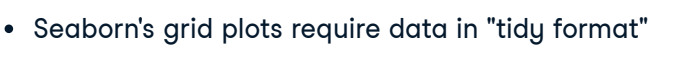

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


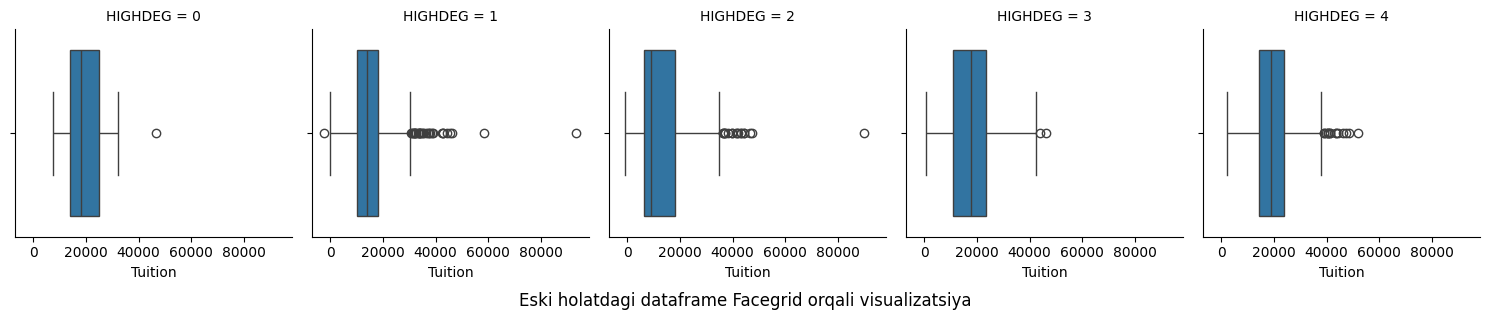

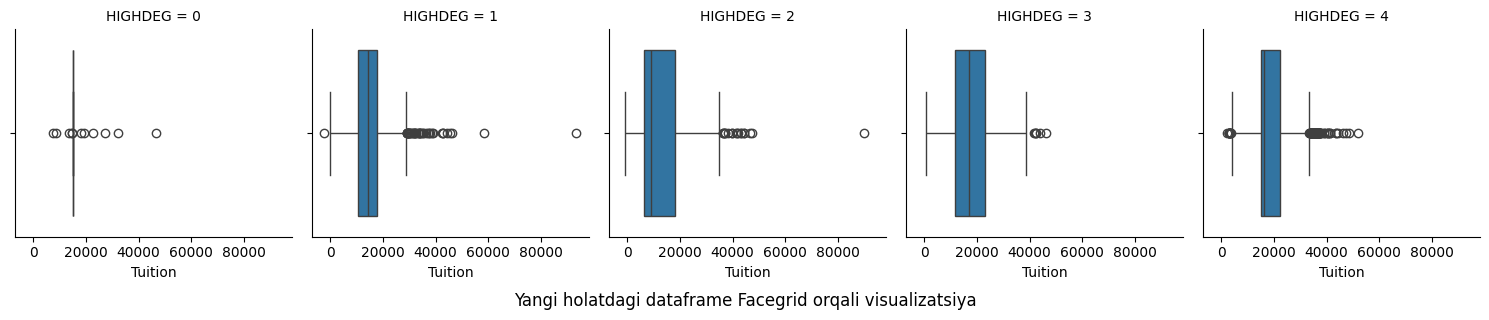

In [24]:
g = sns.FacetGrid(very_old_df, col = 'HIGHDEG')
g.map(sns.boxplot, 'Tuition')
g.figure.suptitle("Eski holatdagi dataframe Facegrid orqali visualizatsiya", y = .01)
g = sns.FacetGrid(df, col = 'HIGHDEG')
g.map(sns.boxplot, 'Tuition')
g.figure.suptitle("Yangi holatdagi dataframe Facegrid orqali visualizatsiya", y = .01)
plt.show()

#### Tozalagangan dataset va tozalanmagan dataset o'rtasidagi farq Facegrid (yangi mavzu) yordamida va boxplotlar bilan chiqarildi. Ko'rib turganimizdek o'zgarishlar bor

In [25]:
import seaborn as sns
g = sns.FacetGrid(very_old_df, col = 'HIGHDEG', hue = 'HIGHDEG')
g.map(plt.scatter, 'Tuition', 'PCTPELL')
g.figure.suptitle("Eski holatdagi dataframe Facegrid orqali visualizatsiya", y = .01)
g = sns.FacetGrid(df, col = 'HIGHDEG', hue = 'HIGHDEG')
g.map(plt.scatter, 'Tuition', 'PCTPELL')
g.figure.suptitle("Eski holatdagi dataframe Facegrid orqali visualizatsiya", y = .01)
plt.show()

#### Tozalagangan dataset va tozalanmagan dataset o'rtasidagi farq Facegrid (yangi mavzu) yordamida va scatterplot bilan chiqarildi. Ko'rib turganimizdek o'zgarishlar deyarli ko'zga tashlanarli darajada emas

### Endigi galda ma'noga ega bo'lgan visualizatsiyalarni chiqaramiz Pairplot, joinplot, regplot va boshqalar bilan

In [ ]:
df.head()

,INSTNM,OPEID,REGION,PCTPELL,PCTFLOAN,COMPL_RPY_5YR_RT,DEBT_MDN,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,0.7249,0.8159,0.477632,14600.0,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,0.3505,0.5218,0.673230,14250.0,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,0.7455,0.8781,0.636364,11082.0,1,4,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,0.3179,0.4589,0.762222,15000.0,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,0.7567,0.7692,0.430070,15274.0,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


### O'rtacha qarz miqdori va Pell foizlarini distogramma orqali chiqarib olamiz

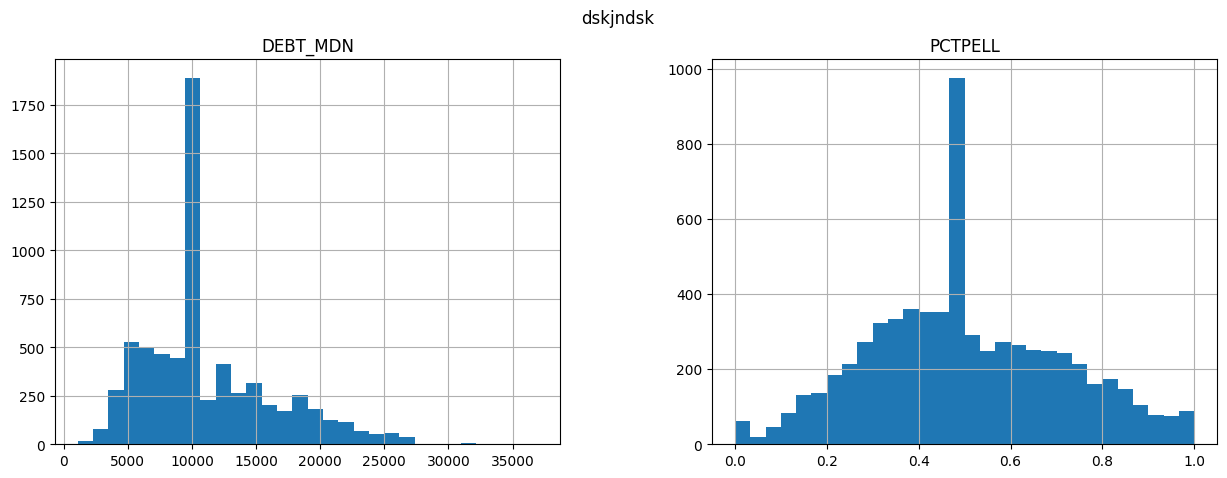

In [ ]:
df[['DEBT_MDN', 'PCTPELL']].hist(bins = 30, figsize = (15, 5), layout = (1, 2))
plt.suptitle('dskjndsk')
plt.show()

### Standard scaling orqali scaling qilamiz

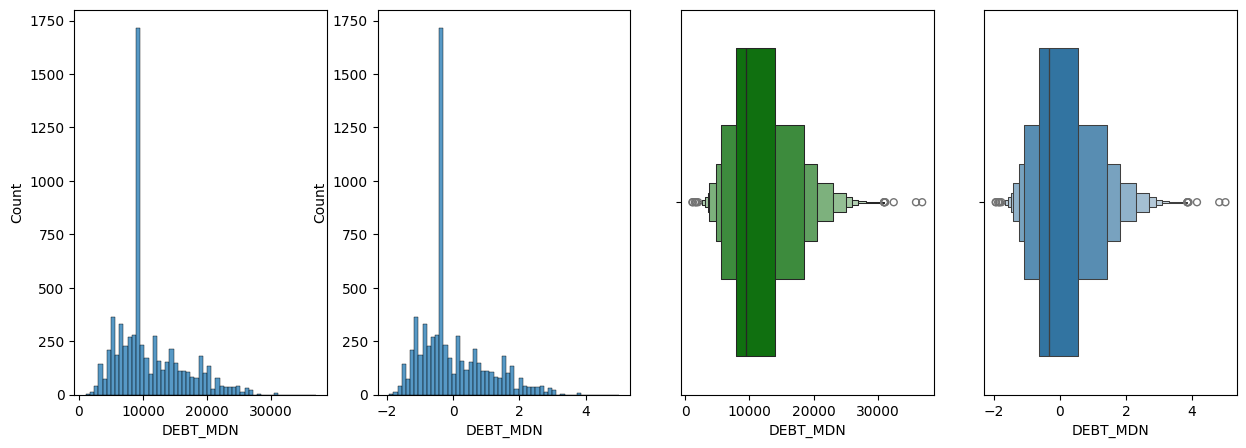

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize = (15, 5))
x = df[['DEBT_MDN']]
debt_mdn = (x - x.mean()) / x.std()
sns.histplot(data = df, x = 'DEBT_MDN', ax = ax0)
sns.histplot(data = debt_mdn, x = 'DEBT_MDN', ax = ax1)
sns.boxenplot(data = df, x = 'DEBT_MDN', ax = ax2, color = 'green')
sns.boxenplot(data = debt_mdn, x = 'DEBT_MDN', ax = ax3)
plt.show()

#### Natijada o'rta qiymatni 0ga olib kelib qoyildi va standard deviationlar +-1 ga teng lekin shakli o'zgarmadi


### Robust scaling orqali ham scaling qilib ko'ramiz

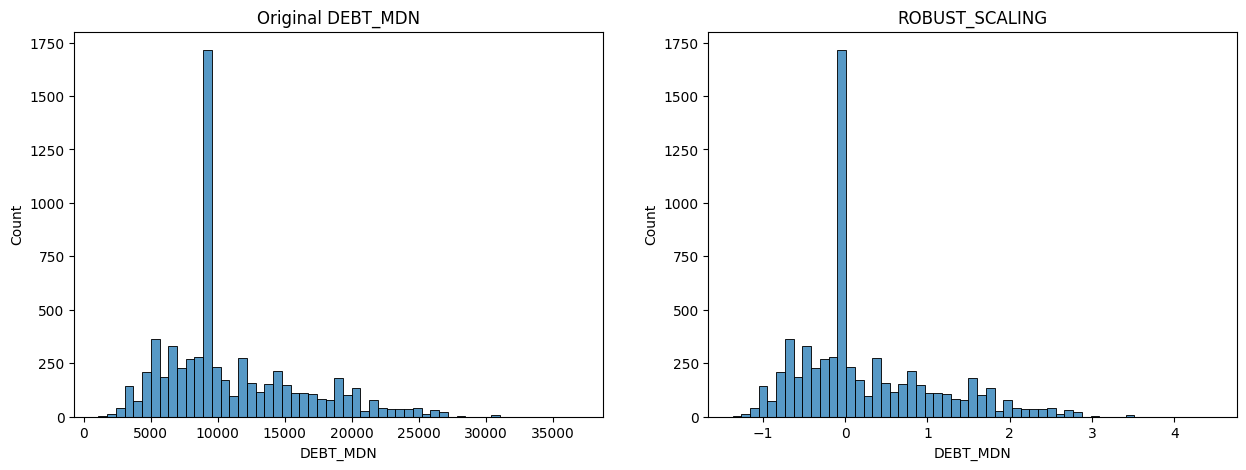

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize = (15, 5))
IQR = x.quantile(0.75) - x.quantile(0.25)
robust_scaling = (x - x.median()) / IQR
sns.histplot(data = df, x = 'DEBT_MDN', ax = ax0).set(title = ('Original DEBT_MDN'))
sns.histplot(data = robust_scaling, x = 'DEBT_MDN', ax = ax1).set(title = ('ROBUST_SCALING'))
plt.show()

### Median 0ga olib kelindi Robust scaling orqali

### PairGriddan foydalanib ko'ramiz

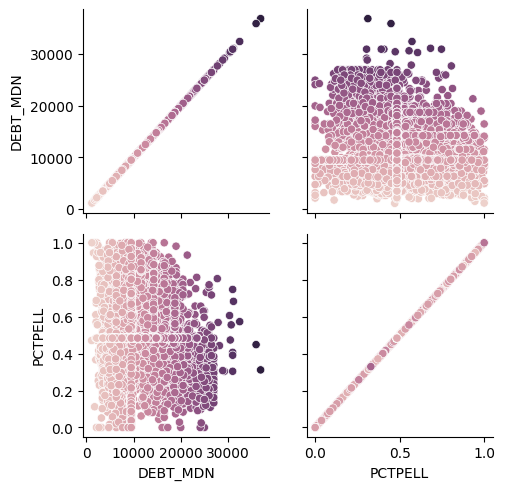

In [ ]:
g = sns.PairGrid(df, vars = ['DEBT_MDN', 'PCTPELL'], hue = 'DEBT_MDN')
g.map(sns.scatterplot)
plt.show()

#### O'ziga o'zi nisbati olingani uchun diagonalda tik o'sish kuzatilgan ya'ni korrelatsiya bir xil

### PairGridlarning o'zimiz diagonallarini boshqarishimiz mumkin 

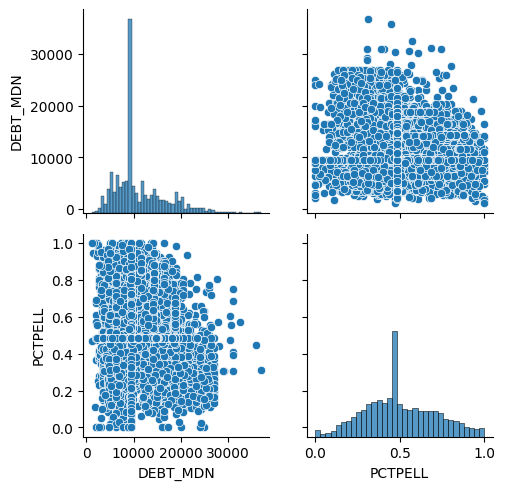

In [ ]:
g = sns.PairGrid(df, vars = ['DEBT_MDN', 'PCTPELL'])
g = g.map_diag(sns.histplot)
g = g.map_offdiag(sns.scatterplot)
plt.show()

### Diagonallar distogrammaga o'zgardi

### JointGridni ham ishlatib ko'ramiz

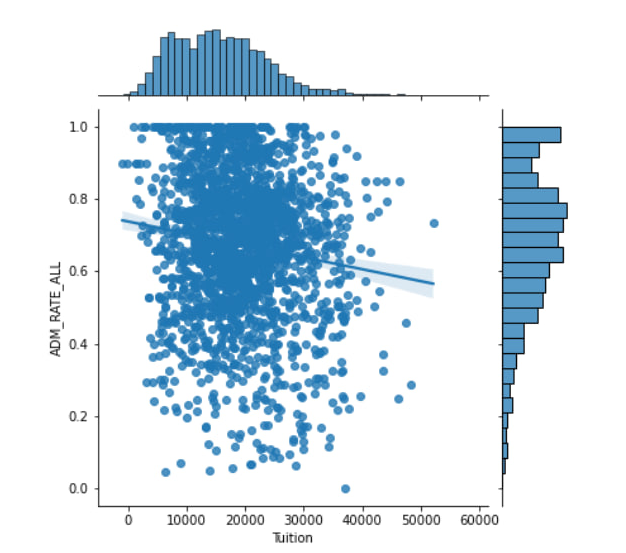

### Rasmda ko'rib turganimiz bu jointgrid endi buni o'zimizning ustunlarimiz yordamida yasab olamiz

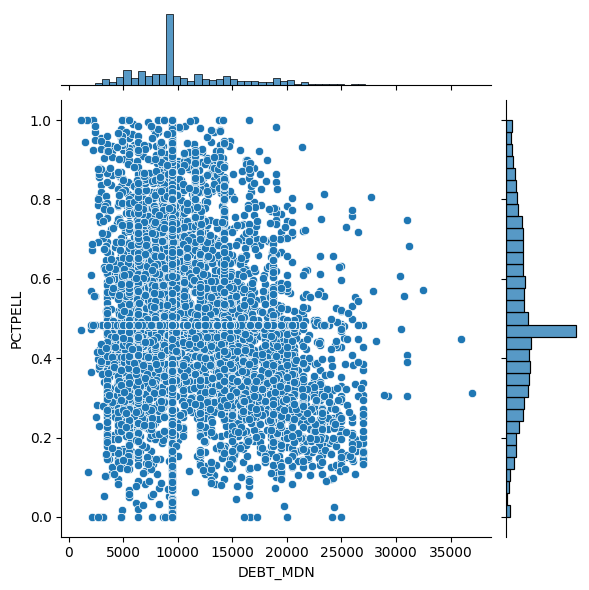

In [ ]:
g = sns.JointGrid(df, x = 'DEBT_MDN', y = 'PCTPELL')
g.plot(sns.scatterplot, sns.histplot)
plt.show()

### Facegridga nisbatan ba'zi sintaktik farqlari bor

### Advanced jointGriddan ham foydalanib kor'ramiz

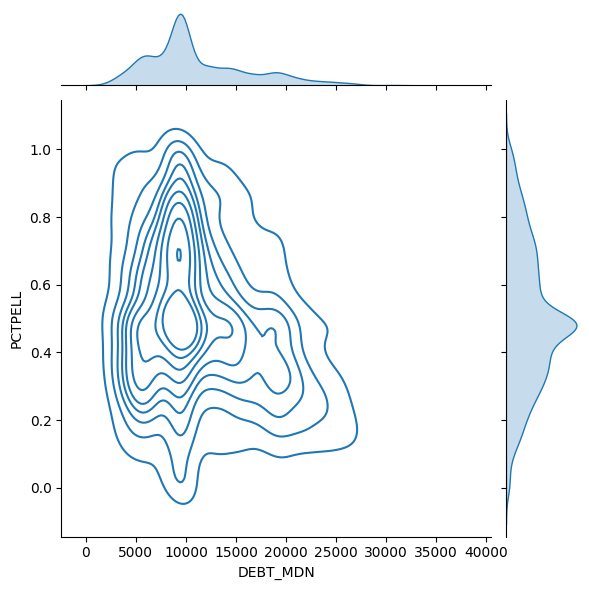

In [ ]:
g = sns.JointGrid(df, x = 'DEBT_MDN', y = 'PCTPELL')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, fill = True)
plt.show()

### Bu grafimiz advanced jointgrid bo'lib geografiyadagi geopolitikal xaritani eslatadi, yani aylananing eng ichki qismi cho'qqi bu yerda ham huddi shu vaziyat aylanalarning eng ichki qismi bu eng zich qismi hisoblanadi

#### Jointplot() dan ham foydalanib ko'ramiz

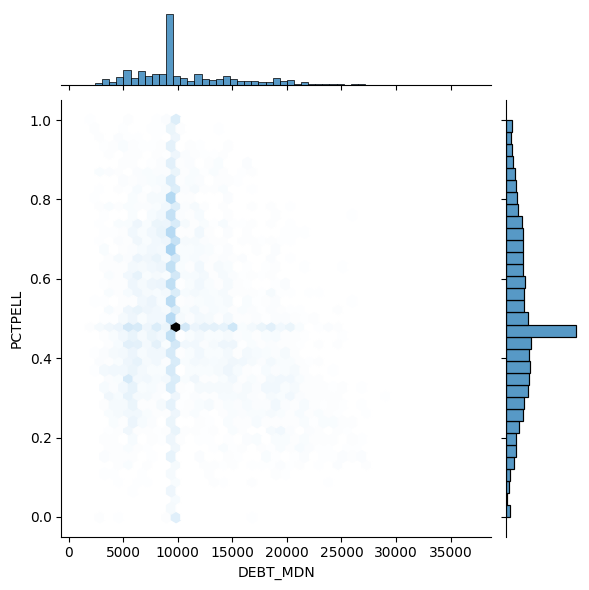

In [ ]:
sns.jointplot(df,x = 'DEBT_MDN', y = 'PCTPELL', kind = 'hex')
plt.show()

In [ ]:
df.head()

,INSTNM,OPEID,REGION,PCTPELL,PCTFLOAN,COMPL_RPY_5YR_RT,DEBT_MDN,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,0.7249,0.8159,0.477632,14600.0,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,0.3505,0.5218,0.673230,14250.0,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,0.7455,0.8781,0.636364,11082.0,1,4,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,0.3179,0.4589,0.762222,15000.0,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,0.7567,0.7692,0.430070,15274.0,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City
